In [1]:
# python -m pip install prophet
# here i will try prophet on the loged data so log(x)

In [1]:
import numpy as np
import pandas as pd
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.express as px
from datetime import datetime,date
from prophet import Prophet

%matplotlib inline
init_notebook_mode(connected=True)
cf.set_config_file(sharing='private',theme='pearl',offline=True)
#print("Cufflinks Version : {}".format(cf.__version__))

# facebook prophet requires the data to be in 2 colums named ds and y
# ds will be a datetime column with no timezone data and y the label we are forecasting
# ds must NOT be an index like other machine learning algorithms
dfActual = pd.read_csv('./data/BTC-USD.csv')
df = pd.read_csv('./data/btc-usd-max.csv')
df.drop(["market_cap", "total_volume"], axis=1, inplace=True)
df['price'].fillna(method='ffill', inplace=True)
df.columns = ['ds','y']
# log data for btc
# df['y'] = np.log(df['y'])
# df['y'].iplot();
dynamic_days = 1550

In [2]:
df['y'].iplot();

In [3]:
df['ds'] = pd.to_datetime(df['ds'])
df['ds'] = df['ds'].dt.tz_localize(None)

In [4]:
df.head()

,ds,y
0,2013-04-28,135.30
1,2013-04-29,141.96
2,2013-04-30,135.30
3,2013-05-01,117.00
4,2013-05-02,103.43


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3432 non-null   datetime64[ns]
 1   y       3432 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 53.8 KB


In [6]:
df['floor'] = 0
df['cap'] = 68500
train = df.iloc[:-dynamic_days]
test = df.iloc[-dynamic_days:]

In [7]:
# This is fitting only on the training data
# now I will include the test data in the training set and forecast 2 months in the future
m = Prophet(weekly_seasonality=False, yearly_seasonality=False, daily_seasonality=False, 
                growth='logistic', seasonality_mode='multiplicative')
m.add_seasonality(name='4-year', period=1350, fourier_order=10)
m.fit(train)
# just a placeholder to hold our future predictions
# periods is how far in the future we want to predict and freq is the frequency of the data
# if we want monthly data then freq='MS'
future = m.make_future_dataframe(periods=dynamic_days,freq = 'D')
future['cap'] = 68000
future['floor'] = 0
# to make predictions 
forecast = m.predict(future)

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [8]:
forecast

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,4-year,4-year_lower,4-year_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2013-04-28,84.785882,68000,0,-852.347716,860.660387,84.785882,84.785882,-0.558991,-0.558991,-0.558991,-0.558991,-0.558991,-0.558991,0.0,0.0,0.0,37.391366
1,2013-04-29,84.975030,68000,0,-811.445086,867.456009,84.975030,84.975030,-0.562288,-0.562288,-0.562288,-0.562288,-0.562288,-0.562288,0.0,0.0,0.0,37.194562
2,2013-04-30,85.164599,68000,0,-811.918349,862.452800,85.164599,85.164599,-0.565364,-0.565364,-0.565364,-0.565364,-0.565364,-0.565364,0.0,0.0,0.0,37.015640
3,2013-05-01,85.354591,68000,0,-865.048712,884.142754,85.354591,85.354591,-0.568207,-0.568207,-0.568207,-0.568207,-0.568207,-0.568207,0.0,0.0,0.0,36.855524
4,2013-05-02,85.545007,68000,0,-901.709558,888.754817,85.545007,85.545007,-0.570810,-0.570810,-0.570810,-0.570810,-0.570810,-0.570810,0.0,0.0,0.0,36.715096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,2022-09-17,49238.530813,68000,0,12719.366354,14368.420434,49238.529228,49238.532423,-0.723807,-0.723807,-0.723807,-0.723807,-0.723807,-0.723807,0.0,0.0,0.0,13599.347283
3428,2022-09-18,49268.826632,68000,0,13580.331352,15320.324350,49268.825047,49268.828242,-0.706391,-0.706391,-0.706391,-0.706391,-0.706391,-0.706391,0.0,0.0,0.0,14465.773661
3429,2022-09-19,49299.092110,68000,0,14496.819378,16213.258395,49299.090526,49299.093720,-0.688634,-0.688634,-0.688634,-0.688634,-0.688634,-0.688634,0.0,0.0,0.0,15350.056035
3430,2022-09-20,49329.327218,68000,0,15410.602802,17131.276769,49329.325634,49329.328828,-0.670576,-0.670576,-0.670576,-0.670576,-0.670576,-0.670576,0.0,0.0,0.0,16250.278919


<AxesSubplot:xlabel='ds'>

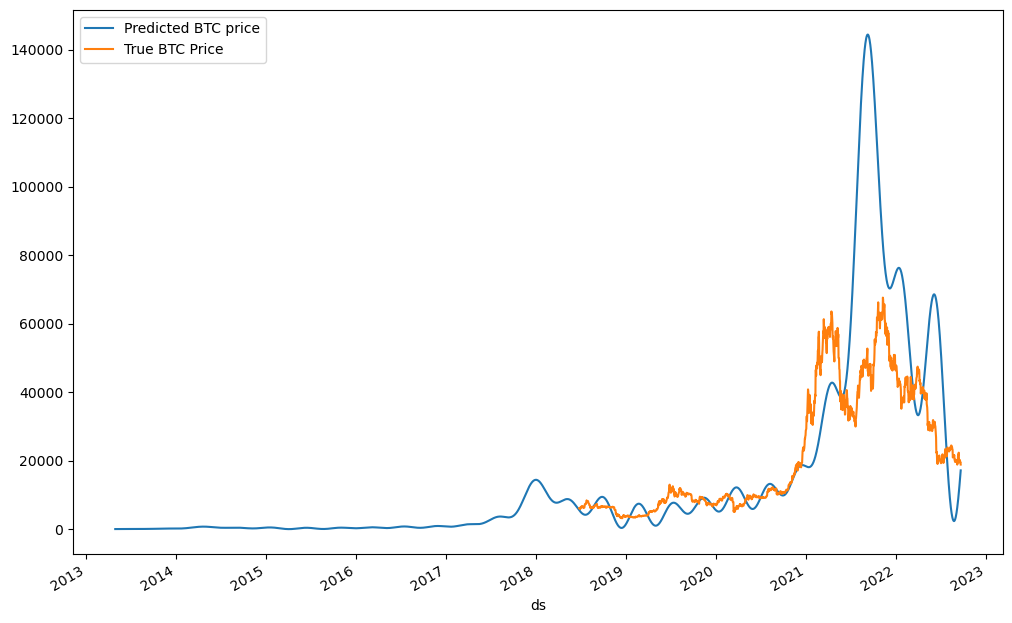

In [9]:
ax = forecast.plot(x='ds',y='yhat',label='Predicted BTC price',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True BTC Price',legend=True,ax=ax)

In [10]:
from statsmodels.tools.eval_measures import rmse

In [11]:
predictions = forecast.iloc[-dynamic_days:]['yhat']

In [12]:
rmse(predictions,test['y'])

24010.04770634991

In [13]:
# very large difference as it is roughly as equal half of the mean
test.mean()

C:\Users\sagap\AppData\Local\Temp\ipykernel_17600\3796774242.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y        21730.279757
floor        0.000000
cap      68500.000000
dtype: float64

In [14]:
# prophet has its own diagnostics. we need to define just as done below initial, period and horizon
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [15]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 1 years
period = 1 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [16]:
#df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

In [17]:
# thgis is the raw dataset that is returned via the above
#performance_metrics(df_cv)

In [18]:
# we can plt a specific metric of the above which shows that mse increases over time so up to 50 days we are ok
# more than that rmse increases a lot
#plot_cross_validation_metric(df_cv, metric='rmse');

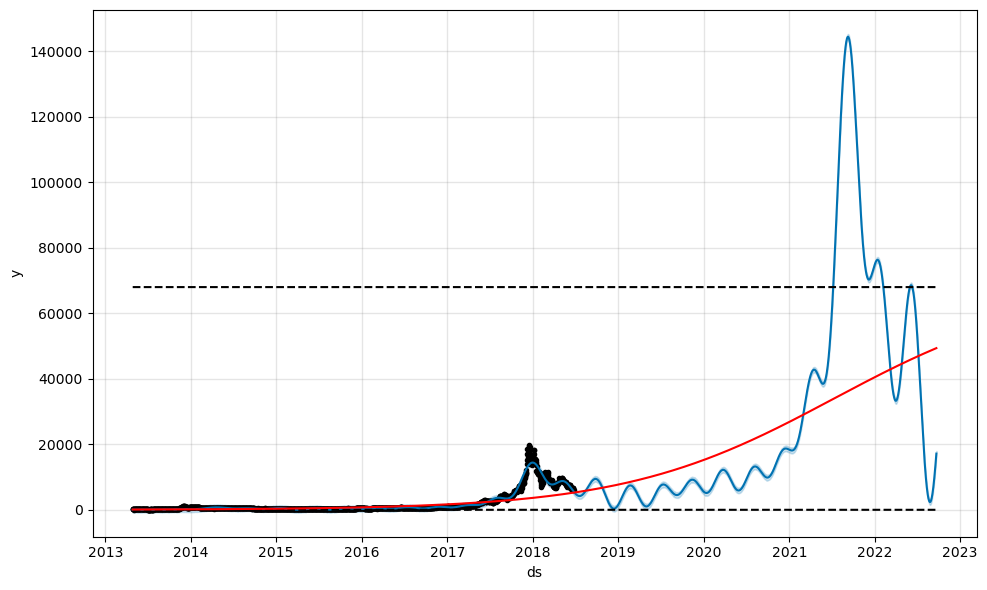

In [19]:
# to see the trend change points
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

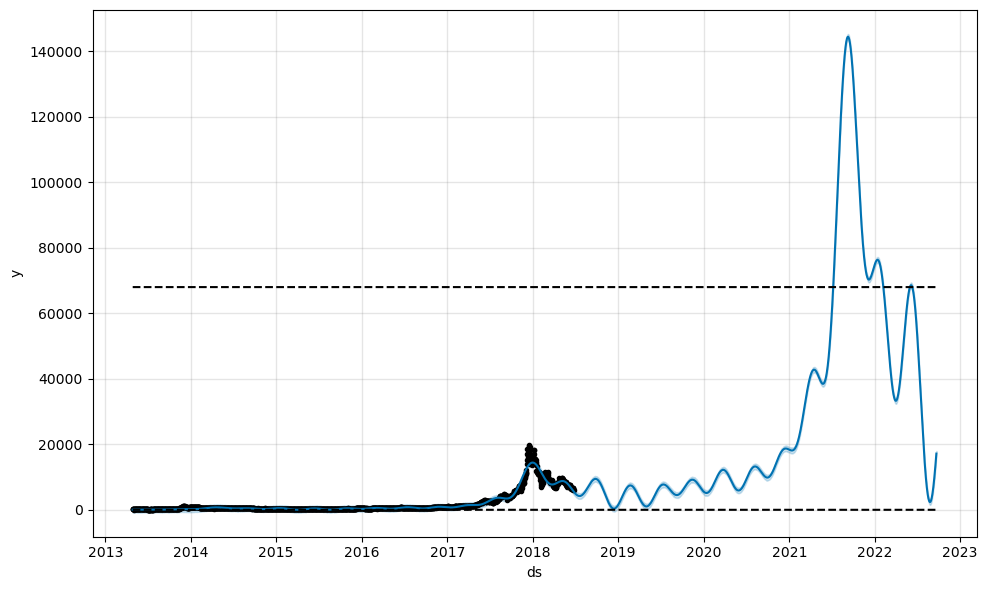

In [20]:
# we can use prophets own tools for plotting and analysis
import matplotlib.pyplot as plt
m.plot(forecast);
# plt.xlim('2014-01-01','2022-01-01') # we can use xlim to limit the data being plotted

In [21]:
# now I will include the test data in the training set and forecast 2 months in the future

m = Prophet(weekly_seasonality=False, yearly_seasonality=False, daily_seasonality=False, 
                growth='logistic', seasonality_mode='multiplicative')
m.add_seasonality(name='4-year', period=1350, fourier_order=10)
m.fit(df)
# just a placeholder to hold our future predictions
# periods is how far in the future we want to predict and freq is the frequency of the data
# if we want monthly data then freq='MS'
future = m.make_future_dataframe(periods=dynamic_days,freq = 'D')
future['cap'] = 68000
future['floor'] = 0
# to make predictions 
forecast = m.predict(future)


C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



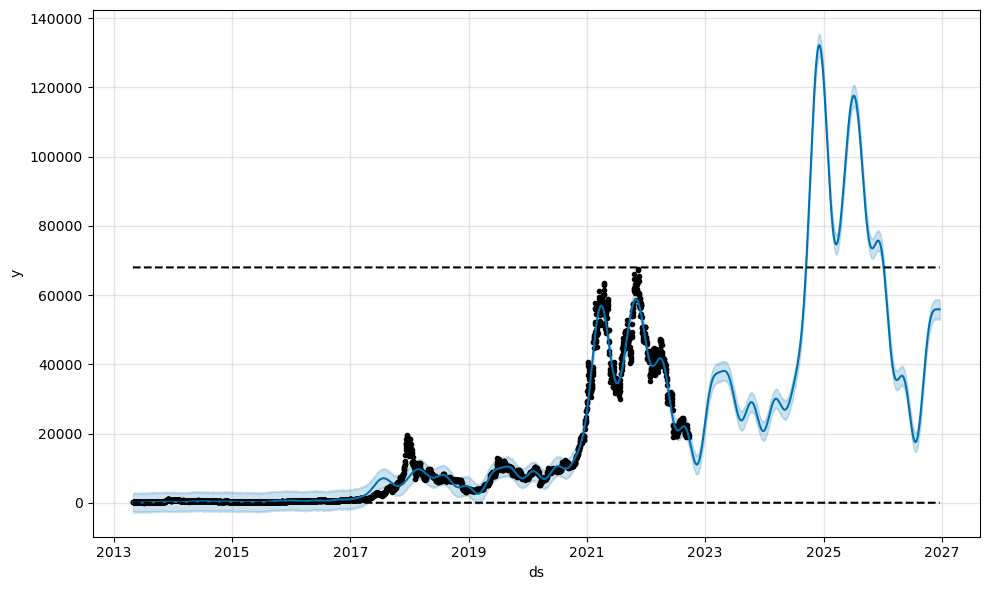

In [22]:
fig = m.plot(forecast)

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



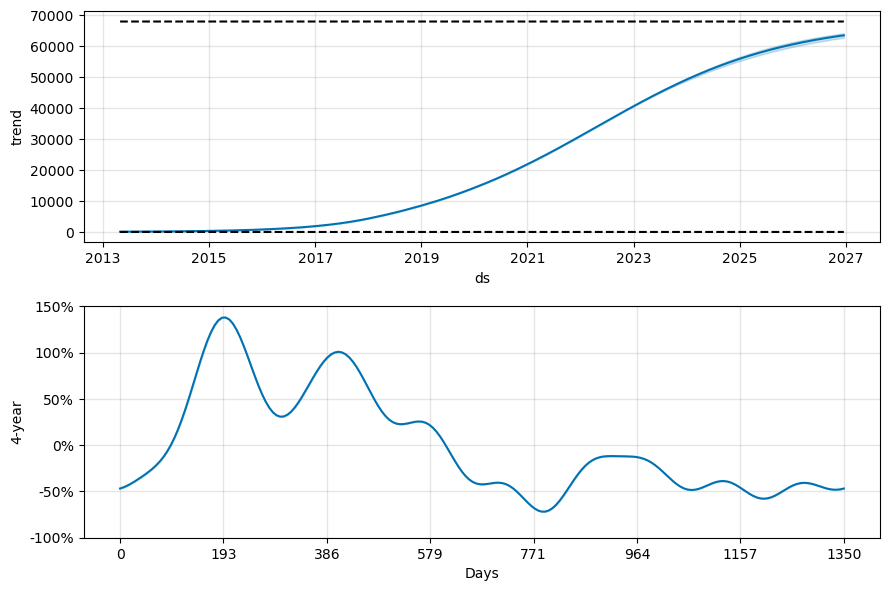

In [23]:
fig = m.plot_components(forecast)

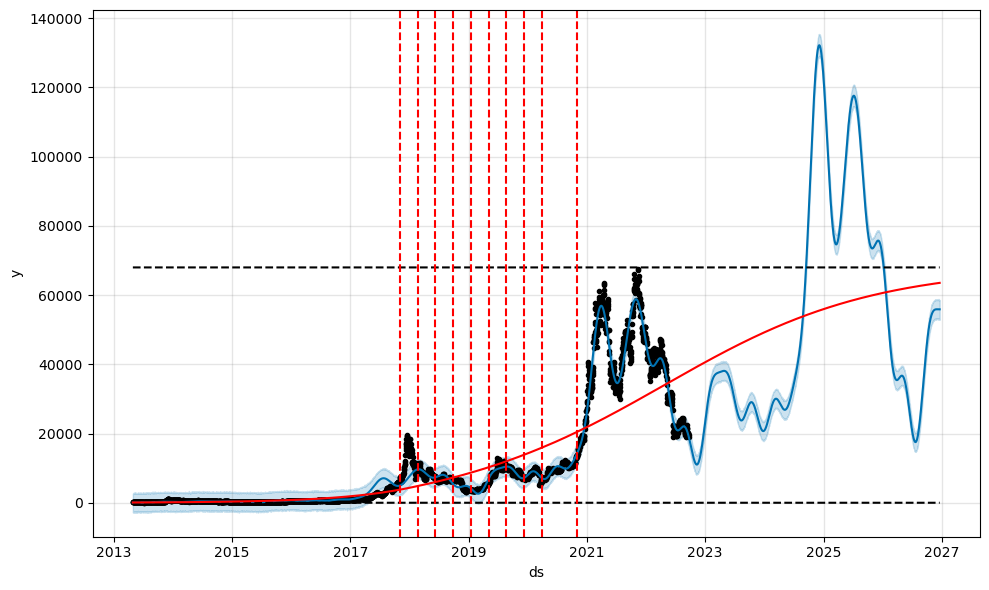

In [24]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [25]:
# final plot but with plotly
forecastPlotly = forecast.copy()
forecastPlotly['date'] = pd.to_datetime(forecastPlotly['ds'])
forecastPlotly = forecastPlotly.set_index('date')
forecastPlotly = forecastPlotly.drop(['ds'], axis=1)
forecastPlotly[['yhat_lower','yhat_upper', 'yhat']].iplot()

In [26]:
dfActual['date'] = pd.to_datetime(dfActual['Date'])
dfActual = dfActual.set_index('date')
dfActual = dfActual.drop(['Date'], axis=1)
result = forecastPlotly.join(dfActual, how='outer')

In [27]:
result[['yhat', 'Close']].iplot()